# Data Exploration Notebook

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys 
import matplotlib.ticker as ticker
import os
import glob
import plotly.graph_objects as go # install plotly if you dont have it
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_colwidth', None)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Part 1: Channel and Timeseries Dataset Analysis

In [2]:
# read data timeseries and channel
timeseries_df = pd.read_csv('../data/df_timeseries_en.tsv.gz', sep='\t')
channel_df = pd.read_csv('../data/df_channels_en.tsv.gz', sep='\t')

timeseries_df.dropna(axis=0, inplace=True)
channel_df.dropna(axis=0, inplace=True)

In [3]:
timeseries_df.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [9]:
print(len(channel_df))
channel_df.head()

136331


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


### Change to specific datetime format

In [12]:
# combining the channels dataframe with the time series one
timeseries_w_channels_df = pd.merge(timeseries_df,channel_df, on='channel',how='left')
timeseries_w_channels_df['datetime'] = pd.to_datetime(timeseries_w_channels_df['datetime'], format='%Y-%m-%d').dt.date
timeseries_w_channels_df['datetime'] = pd.to_datetime(timeseries_w_channels_df['datetime'], format='%Y-%m-%d')
timeseries_w_channels_df = timeseries_w_channels_df.drop(['videos_cc', 'subscribers_cc', 'subscriber_rank_sb', 'weights', 'join_date', 'category_cc', 'activity'], axis=1)

In [13]:
timeseries_w_channels_df

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,name_cc
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03,2.024946e+05,0.000000,650.222222,0.000000,5,0,MagnusNation
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,MagnusNation
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,MagnusNation
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,MagnusNation
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,MagnusNation
...,...,...,...,...,...,...,...,...,...,...
18851910,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-02,6.012938e+06,232418.277778,61268.611111,1305.611111,278,2,Alex N.
18851911,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-09,6.244579e+06,231640.888889,62631.666667,1363.055556,287,9,Alex N.
18851912,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-16,6.480902e+06,236322.933333,64010.000000,1378.333333,294,7,Alex N.
18851913,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-23,6.745317e+06,264415.200000,65480.000000,1470.000000,301,7,Alex N.


In [14]:
# gets the videos grouped by categories
timeseries_w_channels_df.groupby(by=['category'])['category'].count().sort_values(ascending=False)

category
Music                    3532411
Entertainment            3071292
Gaming                   2825331
People & Blogs           2178182
Howto & Style            1723049
Education                1111784
Film and Animation        934776
Sports                    762263
Science & Technology      705228
Autos & Vehicles          552169
Comedy                    513748
News & Politics           323611
Travel & Events           289969
Pets & Animals            177085
Nonprofits & Activism     151017
Name: category, dtype: int64

In [15]:
print(len(timeseries_w_channels_df))

18851915


### Get the Average number of Views per category 

In [ ]:
#Way to normalize the popularity of the topics because of the varying number of channels covering each
#Need to sum up the number total number of views for each category and divide by the number of videos corresponding to that category

### filter dataframe for only important features

In [18]:
df = timeseries_w_channels_df.copy()
df = df.drop(['channel', 'name_cc'], axis=1)
df.head()

,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos
0,Film and Animation,2017-07-03,2.024946e+05,0.000000,650.222222,0.000000,5,0
1,Film and Animation,2017-07-10,3.940857e+05,191591.111111,1046.000000,395.777778,6,1
2,Film and Animation,2017-07-17,8.353938e+05,441308.083333,1501.500000,455.500000,6,0
3,Film and Animation,2017-07-24,1.104577e+06,269183.250000,1750.000000,248.500000,6,0
4,Film and Animation,2017-07-31,1.284406e+06,179828.600000,2008.300000,258.300000,6,0


### Gets each deltaviews (views per week) for each category and sums it up to get one data point

In [19]:
df_out = (df.groupby(['category', pd.Grouper(key='datetime', freq='D')])
             .last()
             .reset_index()
         ).replace([None], [np.nan])

In [20]:
df_out['category'].value_counts()

Gaming                   334
Entertainment            333
Film and Animation       333
Howto & Style            333
People & Blogs           327
Education                323
Music                    320
Autos & Vehicles         312
Sports                   307
Comedy                   303
Pets & Animals           295
News & Politics          294
Science & Technology     287
Nonprofits & Activism    283
Travel & Events          266
Name: category, dtype: int64

### plots with no normalizations applied. Raw timeseries interactive plots using plotly

**Note! Plotly graphs will not show up on Github. However we do have plots!**

In [21]:
fig = go.Figure()
list_category = list(set(df['category']))
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_category)).as_hex())

for d,p in zip(list_category, pal):
    fig.add_trace(go.Scatter(x = df_out[df_out['category']==d]['datetime'],
                             y = df_out[df_out['category']==d]['delta_views'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))   #tozeroy 

fig.show()

- this looks bad and noisy in weeks - Simon Lee

In [22]:
fig = go.Figure()
for d,p in zip(list_category, pal):
    fig.add_trace(go.Scatter(x = df_out[df_out['category']==d]['datetime'],
                             y = df_out[df_out['category']==d]['delta_views'],
                             name = d,
                             line_color = p,
                             fill=None))   #tozeroy 
fig.update_yaxes(type="log")                             
fig.show()

In [23]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   category      4650 non-null   object        
 1   datetime      4650 non-null   datetime64[ns]
 2   views         4650 non-null   float64       
 3   delta_views   4650 non-null   float64       
 4   subs          4650 non-null   float64       
 5   delta_subs    4650 non-null   float64       
 6   videos        4650 non-null   int64         
 7   delta_videos  4650 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 290.8+ KB


In [24]:
df_out['date'] = df_out['datetime'].dt.to_period('M')

### gets the sums per month

In [25]:
df_out2 = df_out.groupby(['category', 'date']).sum()

In [27]:
df_out2.reset_index(inplace=True)
df_out2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   category      789 non-null    object   
 1   date          789 non-null    period[M]
 2   views         789 non-null    float64  
 3   delta_views   789 non-null    float64  
 4   subs          789 non-null    float64  
 5   delta_subs    789 non-null    float64  
 6   videos        789 non-null    int64    
 7   delta_videos  789 non-null    int64    
dtypes: float64(4), int64(2), object(1), period[M](1)
memory usage: 49.4+ KB


In [29]:
df_out2['date'] = df_out2['date'].astype(str)
df_out2['date'] = pd.to_datetime(df_out2['date'])
df_out2

,category,date,views,delta_views,subs,delta_subs,videos,delta_videos
0,Autos & Vehicles,2015-06-01,9.385349e+06,312225.000000,10628.250000,267.000000,0,0
1,Autos & Vehicles,2015-07-01,8.661430e+06,281126.000000,9683.875000,249.000000,0,0
2,Autos & Vehicles,2015-08-01,1.230435e+07,294847.090909,13406.272727,270.272727,0,0
3,Autos & Vehicles,2015-09-01,2.357746e+07,571202.534091,38746.125000,423.602273,525,3
4,Autos & Vehicles,2015-10-01,3.033862e+07,686540.919689,50172.857513,631.984456,714,3
...,...,...,...,...,...,...,...,...
784,Travel & Events,2019-05-01,6.624448e+06,7787.376157,88202.523148,29.325231,548,0
785,Travel & Events,2019-06-01,6.657069e+06,8317.776305,88369.266835,53.273569,548,0
786,Travel & Events,2019-07-01,8.365512e+06,9555.698232,110738.123016,49.328283,685,0
787,Travel & Events,2019-08-01,6.726046e+06,7288.958965,88706.816919,27.247475,548,0


In [30]:
df_out2['category'].value_counts()

Entertainment            57
Film and Animation       57
Gaming                   57
Howto & Style            57
People & Blogs           56
Education                55
Music                    54
Autos & Vehicles         52
Sports                   52
Comedy                   51
Pets & Animals           50
News & Politics          48
Nonprofits & Activism    48
Science & Technology     48
Travel & Events          47
Name: category, dtype: int64

### Looks much better

In [31]:
# interactive plots
list_category = list(set(df_out2['category']))

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_category)).as_hex())

fig = go.Figure()
for d,p in zip(list_category, pal):
    fig.add_trace(go.Scatter(x = df_out2[df_out2['category']==d]['date'],
                             y = df_out2[df_out2['category']==d]['delta_views'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))   #tozeroy 

fig.show()

### However if log transformed, it can capture whole time series 

In [32]:
# interactive plots
list_category = list(set(df_out2['category']))

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_category)).as_hex())

fig = go.Figure()
for d,p in zip(list_category, pal):
    fig.add_trace(go.Scatter(x = df_out2[df_out2['category']==d]['date'],
                             y = df_out2[df_out2['category']==d]['delta_views'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))   #tozeroy 
fig.update_yaxes(type="log")
fig.show()

### Another visualization method to see the densities in a matrix heat map

In [33]:
df_pivot = pd.pivot_table(df_out2,
                          values='delta_views',
                          index='category',
                          columns='date')
#df_pivot.interpolate(method='polynomial', order=2)
df_pivot = df_pivot.round(2)
df_pivot = df_pivot.fillna(0)
df_pivot

date,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,...,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01
category,,,,,,,,,,,,,,,,,,,,,
Autos & Vehicles,0.00,0.00,0.00,0.00,0.00,312225.00,281126.00,294847.09,571202.53,686540.92,...,320293.11,263141.70,281243.84,262504.06,374007.85,288416.40,263080.97,305770.12,250757.50,332901.57
Comedy,0.00,0.00,0.00,0.00,0.00,0.00,101426.67,264265.83,422272.50,238643.75,...,3087851.19,2819794.96,3602668.52,3490319.34,3712044.60,2895089.56,3259193.76,5352544.49,3629245.65,3712469.49
Education,0.00,0.00,308948.92,54899.62,150465.75,149568.62,0.00,0.00,0.00,141915.61,...,68742.71,40356.90,114986.53,156453.47,41941.24,26141.31,21022.45,30687.24,15889.50,21977.33
Entertainment,2062025.00,2813120.17,1690431.39,271379.71,352956.60,440663.66,322202.05,436659.12,70376.58,48817.55,...,10710386.81,8011838.49,7684896.88,10445362.48,4917453.52,6035700.12,9032064.00,10208349.88,17180795.25,19429189.93
Film and Animation,19730.75,30101.50,33195.23,24602.02,25230.03,37244.04,10105.27,19975.62,15980.50,166521.82,...,1868473.73,504128.36,326054.09,226986.89,299676.38,193010.00,164250.00,265867.50,249360.50,1192034.39
Gaming,29364.65,1857.10,1592.83,1845.49,1983.52,400.09,320.07,400.09,320.07,1336.94,...,64948.04,774255.94,515918.95,919768.33,858329.12,920401.78,1075548.01,1161955.26,906306.81,1207218.07
Howto & Style,441859.10,67.65,77.12,24069.00,78567.27,66474.98,48308.48,80171.72,110786.04,270189.39,...,510676.49,452149.74,451737.43,418579.66,209997.46,153884.25,158386.50,176381.75,126077.25,123926.61
Music,0.00,0.00,0.00,30873.75,36966.25,91014.12,84489.82,113043.68,108870.50,169019.98,...,2988841.34,2430889.93,2707781.75,2452573.38,2639863.29,2238437.75,2233041.50,2668620.12,1957593.00,2317162.21
News & Politics,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,133166.10,...,514039.05,137551.22,128947.33,8912661.51,6256039.24,1086108.38,1310521.12,592602.50,1038196.50,1647197.29


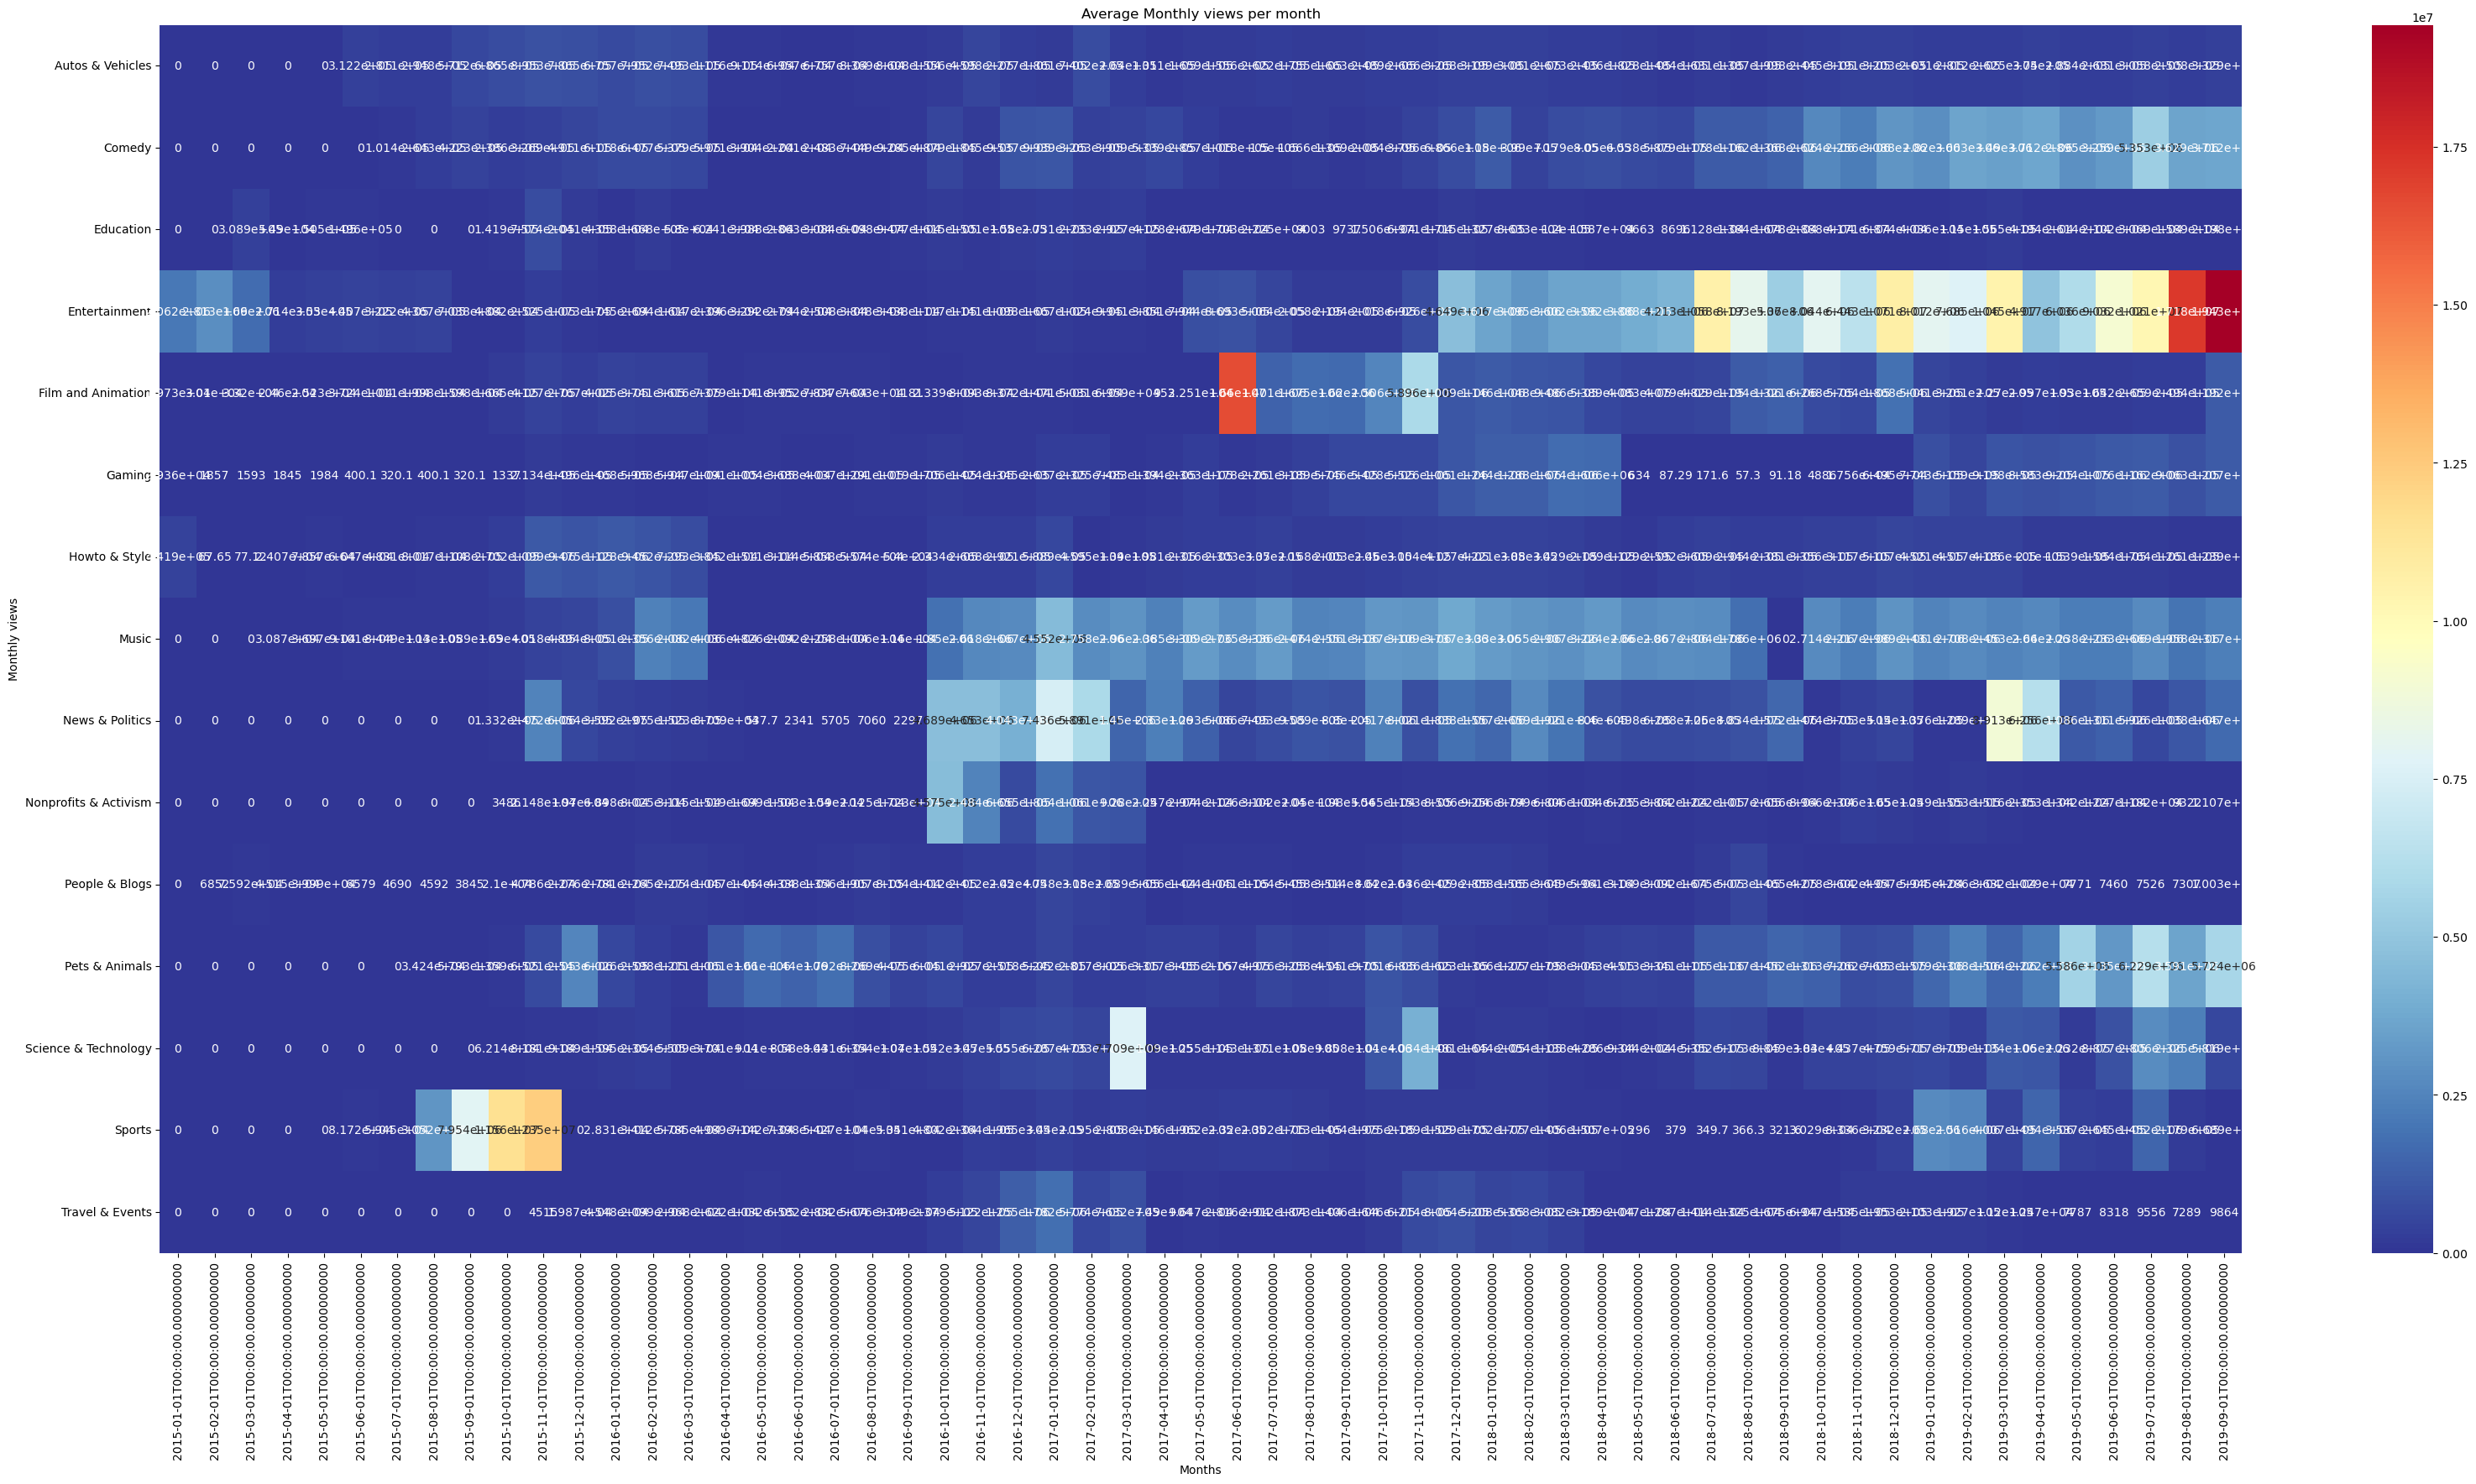

In [34]:
plt.figure(figsize = (40,19))
plt.title('Average Monthly views per month')

sns.heatmap(df_pivot, annot=True, cmap='RdYlBu_r', fmt= '.4g',)
plt.xlabel('Months')
plt.ylabel('Monthly views')
plt.show()

# Part 2: Working with Metadata

- the metadata contains valuable textual data in the ```title``` and ```descriptions``` that we can use for a time series analysis
- this file is much more data rich to perform analysis compared to the timeseries and channels dataset

#### Data Generator
- dont run unless you need to generate data!
- converts our json file into csv so python pandas can handle it better.
- commented out in the meantime so we don't accidently run this expensive line of code

In [ ]:
# # Opening JSON file in chunks and converts it to csv. Don't generate files if you don't need to.
# chunksize = 10 ** 5
# i = 0
# for chunk in pd.read_json('../data/yt_metadata_en.jsonl.gz', lines=True,  chunksize=chunksize):
#     i +=1
#     file = pd.DataFrame(chunk)
#     file.to_csv('../data/metadata_chunks/metadata_'+str(i)+'.csv.gz')

#### combine all the generated chunks into one df

In [36]:
path = '../data/metadata_chunks/'
file_list = os.listdir(path)

In [37]:
os.chdir(path)

In [38]:
#list all csv files only
print(os.getcwd())
csv_files = glob.glob('*.csv.gz')

/Users/simonlee/ada-2022-project-chromegoldfish/data/metadata_chunks


#### Analyzing Political Data

- Our intial analysis that we are interested in is in the ```News & Politics``` Youtube category. We think this one is the most straighforward and also the most interesting to try and catch trends 
- If you want to do more analysis on more categories you can add more predefined categories from our datasets to the variable ```category```

**!! For the current moment we will only work with a sample of our data since it would take extensive time to compute a lot of our analysis !!**

In [50]:
# only reads specific columns since not all information is necessary.
# also only reads in subset of current dataframes since it is super massive
df = pd.DataFrame()
counter = 0

# you can add more categories if we want to do more analysis. category acts as a filter when reading in the chunks of the json files
category = ['News & Politics']
#append all files together
for file in csv_files:
            df_temp = pd.read_csv(file, usecols = ['categories','channel_id', 'description', 'title', 'upload_date', 'tags'])
            df_temp = df_temp[df_temp['categories'].isin(category)] # this will filter for only political channels now
            df = df.append(df_temp, ignore_index=True)
            counter += 1

            # temporary loop stopper. When we do our final analysis we will run it on all metadata chunks
            if counter == 1:
                break
df


/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_19067/3524638661.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,categories,channel_id,description,tags,title,upload_date
0,News & Politics,UCDmXyuvUm8aDC4asAOgFrgQ,"Kyrie Irving on Boston Celtics fans, atmosphere: “There’s nothing like it”",auth-tomwesterholm-auth,"Kyrie Irving on Boston Celtics fans, atmosphere: “There’s nothing like it”",2017-11-30 00:00:00
1,News & Politics,UCDmXyuvUm8aDC4asAOgFrgQ,"Kyrie Irving, Boston Celtics star, loves fourth quarters: “It’s go time”",auth-tomwesterholm-auth,"Kyrie Irving, Boston Celtics star, loves fourth quarters: “It’s go time”",2017-11-30 00:00:00
2,News & Politics,UCDmXyuvUm8aDC4asAOgFrgQ,"Kyrie Irving: Boston Celtics rookie Jayson Tatum is a “high-level player, a high-level mind”",auth-tomwesterholm-auth,"Kyrie Irving: Boston Celtics rookie Jayson Tatum is a “high-level player, a high-level mind”",2017-11-30 00:00:00
3,News & Politics,UCDmXyuvUm8aDC4asAOgFrgQ,NaN,"auth-jking413-auth,Jay-King",Marcus Morris explains difference between starting and coming off bench | Boston Celtics,2017-11-30 00:00:00
4,News & Politics,UCDmXyuvUm8aDC4asAOgFrgQ,Marcus Morris on whether starting for Boston Celtics matters: “Next question”,auth-tomwesterholm-auth,Marcus Morris on whether starting for Boston Celtics matters: “Next question”,2017-11-30 00:00:00
...,...,...,...,...,...,...
15835,News & Politics,UCDiQWrBbKojyaLZaBmWKTbA,"Hello everyone. I would like to introduce all of you to a very useful channel, Mr. Fortune Teller HD. This channel shares you useful information and daily fortune telling.\n\nrfa, rfi, khmer news, khmer hot news, khmer politics, Cambodia, Cambodian news, radios, hun sen, sam rainsy, kem sokha, khem veasna, ldp, cnrp, cpp, long chantha, he phearum, Buddhism, Buddhist monks, venerable Buddhist monks, ឡុង ចន្ថា ហ៊ី ភារម្យ សម្តេច​ ហ៊ុន សែន សម រង្ស៊ី កឹម សុខា ខឹម វាសនា","rfa,rfi,khmer news,khmer hot news,khmer politics,Cambodia,Cambodian news,radios,hun sen,sam rainsy,kem sokha,khem veasna,ldp,cnrp,cpp,long chantha,he phearum,Buddhism,Buddhist monks,venerable Buddhist monks,ឡុង ចន្ថា,ហ៊ី ភារម្យ,សម្តេច ហ៊ុន សែន,សម រង្ស៊ី,កឹម សុខា,ខឹម វាសនា,voa,vod",អុញនោះ! ចប់បាត់ កម្ពុជា | Kingdom of Wonder |The Voice Kids Cambodia|Cambodian Idol,2017-09-18 00:00:00
15836,News & Politics,UCDiQWrBbKojyaLZaBmWKTbA,"Hello everyone. I would like to introduce all of you to a very useful channel, Mr. Fortune Teller HD. This channel shares you useful information and daily fortune telling.\n\nrfa, rfi, khmer news, khmer hot news, khmer politics, Cambodia, Cambodian news, radios, hun sen, sam rainsy, kem sokha, khem veasna, ldp, cnrp, cpp, long chantha, he phearum, Buddhism, Buddhist monks, venerable Buddhist monks, ឡុង ចន្ថា ហ៊ី ភារម្យ សម្តេច​ ហ៊ុន សែន សម រង្ស៊ី កឹម សុខា ខឹម វាសនា","ហ៊ុន សែន,សម រង្ស៊ី,កឹម សុខា,ខឹម វាសនា,rfa,rfi,khmer news,khmer hot news,khmer politics,Cambodia,Cambodian news,radios,hun sen,sam rainsy,kem sokha,khem veasna,ldp,cnrp,cpp,long chantha,he phearum,Buddhism,Buddhist monks,venerable Buddhist monks,ឡុង ចន្ថា,ហ៊ី ភារម្យ,សម្តេច ហ៊ុន សែន,voa,vod",សម្ភាស​ព្រឹទ្ធាចារ្យ លឺ ឡាយស្រេង អំពី​ការ​ចាប់​ខ្លួន​លោក ញឹក ប៊ុនឆៃ,2017-08-06 00:00:00
15837,News & Politics,UCDiQWrBbKojyaLZaBmWKTbA,"Hello everyone. I would like to introduce all of you to a very useful channel, Mr. Fortune Teller HD. This channel shares you useful information and daily fortune telling.\n\nrfa, rfi, khmer news, khmer hot news, khmer politics, Cambodia, Cambodian news, radios, hun sen, sam rainsy, kem sokha, khem veasna, ldp, cnrp, cpp, long chantha, he phearum, Buddhism, Buddhist monks, venerable Buddhist monks, ឡុង ចន្ថា ហ៊ី ភារម្យ សម្តេច​ ហ៊ុន សែន សម រង្ស៊ី កឹម សុខា ខឹម វាសនា","ហ៊ុន សែន,សម រង្ស៊ី,កឹម សុខា,ខឹម វាសនា,rfa,rfi,khmer news,khmer hot news,khmer politics,Cambodia,Cambodian news,radios,hun sen,sam rainsy,kem sokha,khem veasna,ldp,cnrp,cpp,long chantha,he phearum,Buddhism,Buddhist monks,venerable Buddhist monks,ឡុង ចន្ថា,ហ៊ី ភារម្យ,សម្តេច ហ៊ុន សែន,voa,vod,san socher,he pearum,buth savong,សាន សុជា,ប៊ុត សាវង្ស,ទេសនា,សាធុ,សិល,សមាធិ,បញ្ញា",ឡុង ចន្ថា ផ្ញើឲ្យក្រមុំៗ LDP មួយចំនួ

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15840 entries, 0 to 15839
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   categories   15840 non-null  object
 1   channel_id   15840 non-null  object
 2   description  15067 non-null  object
 3   tags         15607 non-null  object
 4   title        15840 non-null  object
 5   upload_date  15840 non-null  object
dtypes: object(6)
memory usage: 742.6+ KB


In [52]:
# removes duplicates of videos 
df_raw = df.drop_duplicates(subset=['title'])

- we want to combine the title and description as one feature so we can do some time series analysis for our textual data

In [53]:
df_raw["video_info"] = df_raw['title'].astype(str) +": "+ df_raw["description"]

/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_19067/855289788.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- a look at our ```df_raw``` which is a simplified metadata file containing only needed features for our analysis

In [54]:
df_raw = df_raw.drop(['title'],  axis=1)
df_raw = df_raw.drop(['description'], axis=1)

In [55]:
# get the channel id's and convert it to a dictionary to get names
category = ['News & Politics']
channel_df = channel_df[channel_df['category_cc'].isin(category)]
channel_dict = dict(zip(channel_df.channel, channel_df.name_cc))

In [56]:
# Remap the channel_id with the channel names to improve who said what in our trend analysis
df = df_raw.replace({"channel_id": channel_dict})
df

,categories,channel_id,tags,upload_date,video_info
0,News & Politics,MassLive,auth-tomwesterholm-auth,2017-11-30 00:00:00,"Kyrie Irving on Boston Celtics fans, atmosphere: “There’s nothing like it”: Kyrie Irving on Boston Celtics fans, atmosphere: “There’s nothing like it”"
1,News & Politics,MassLive,auth-tomwesterholm-auth,2017-11-30 00:00:00,"Kyrie Irving, Boston Celtics star, loves fourth quarters: “It’s go time”: Kyrie Irving, Boston Celtics star, loves fourth quarters: “It’s go time”"
2,News & Politics,MassLive,auth-tomwesterholm-auth,2017-11-30 00:00:00,"Kyrie Irving: Boston Celtics rookie Jayson Tatum is a “high-level player, a high-level mind”: Kyrie Irving: Boston Celtics rookie Jayson Tatum is a “high-level player, a high-level mind”"
3,News & Politics,MassLive,"auth-jking413-auth,Jay-King",2017-11-30 00:00:00,NaN
4,News & Politics,MassLive,auth-tomwesterholm-auth,2017-11-30 00:00:00,Marcus Morris on whether starting for Boston Celtics matters: “Next question”: Marcus Morris on whether starting for Boston Celtics matters: “Next question”
...,...,...,...,...,...
15835,News & Politics,Mr. Fortune Teller H...,"rfa,rfi,khmer news,khmer hot news,khmer politics,Cambodia,Cambodian news,radios,hun sen,sam rainsy,kem sokha,khem veasna,ldp,cnrp,cpp,long chantha,he phearum,Buddhism,Buddhist monks,venerable Buddhist monks,ឡុង ចន្ថា,ហ៊ី ភារម្យ,សម្តេច ហ៊ុន សែន,សម រង្ស៊ី,កឹម សុខា,ខឹម វាសនា,voa,vod",2017-09-18 00:00:00,"អុញនោះ! ចប់បាត់ កម្ពុជា | Kingdom of Wonder |The Voice Kids Cambodia|Cambodian Idol: Hello everyone. I would like to introduce all of you to a very useful channel, Mr. Fortune Teller HD. This channel shares you useful information and daily fortune telling.\n\nrfa, rfi, khmer news, khmer hot news, khmer politics, Cambodia, Cambodian news, radios, hun sen, sam rainsy, kem sokha, khem veasna, ldp, cnrp, cpp, long chantha, he phearum, Buddhism, Buddhist monks, venerable Buddhist monks, ឡុង ចន្ថា ហ៊ី ភារម្យ សម្តេច​ ហ៊ុន សែន សម រង្ស៊ី កឹម សុខា ខឹម វាសនា"
15836,News & Politics,Mr. Fortune Teller H...,"ហ៊ុន សែន,សម រង្ស៊ី,កឹម សុខា,ខឹម វាសនា,rfa,rfi,khmer news,khmer hot news,khmer politics,Cambodia,Cambodian news,radios,hun sen,sam rainsy,kem sokha,khem veasna,ldp,cnrp,cpp,long chantha,he phearum,Buddhism,Buddhist monks,venerable Buddhist monks,ឡុង ចន្ថា,ហ៊ី ភារម្យ,សម្តេច ហ៊ុន សែន,voa,vod",2017-08-06 00:00:00,"សម្ភាស​ព្រឹទ្ធាចារ្យ លឺ ឡាយស្រេង អំពី​ការ​ចាប់​ខ្លួន​លោក ញឹក ប៊ុនឆៃ: Hello everyone. I would like to introduce all of you to a very useful channel, Mr. Fortune Teller HD. This channel shares you useful information and daily fortune telling.\n\nrfa, rfi, khmer news, khmer hot news, khmer politics, Cambodia, Cambodian news, radios, hun sen, sam rainsy, kem sokha, khem veasna, ldp, cnrp, cpp, long chantha, he phearum, Buddhism, Buddhist monks, venerable Buddhist monks, ឡុង ចន្ថា ហ៊ី ភារម្យ សម្តេច​ ហ៊ុន សែន សម រង្ស៊ី កឹម សុខា ខឹម វាសនា"
15837,News & Politics,Mr. Fortune Teller H...,"ហ៊ុន សែន,សម រង្ស៊ី,កឹម សុខា,ខឹម វាសនា,rfa,rfi,khmer news,khmer hot news,khmer politics,Cambodia,Cambodian news,radios,hun sen,sam rainsy,kem sokha,khem veasna,ldp,cnrp,cpp,long chantha,he phearum,Buddhism,Buddhist monks,venerable Buddhist monks,ឡុង ចន្ថា,ហ៊ី ភារម្យ,សម្តេច ហ៊ុន សែន,voa,vod,san socher,he pearum,buth savong,សាន សុជា,ប៊ុត សាវង្ស,ទេសនា,សាធុ,សិល,សមាធិ,បញ្ញា",2017-07-29 00:00:00,"ឡុង ចន្ថា ផ្ញើឲ្យក្រមុំៗ LDP មួយចំនួននៅកូរ៉េ​​| Long Chantha | Buddhist Sermon | Preach: Hello everyone. I would like to introduce all of you to a very useful channel, Mr. Fortune Teller HD. This channel shares you useful information and daily fortune telling.\n\nrfa, rfi, khmer news, khmer hot news, khmer politics, Cambodia, Cambodian news, radios, hun sen, sam rainsy, kem sokha, khem veasna, ldp, cnrp, cpp, long chantha, he phearum, Buddhism, Buddhist monks, venerable Buddhist monks, ឡុង ចន្ថា ហ៊ី ភារម្យ សម្តេច​ ហ៊ុន សែន សម រង្ស៊ី កឹម សុខា ខឹម វាសនា"
15838,News & Politics,Mr. Fortune Teller H...,"ហ៊ុន សែន,សម រង្ស៊ី,កឹម សុខា,ខឹម វាសនា,rfa,rfi,khmer news,khmer 

# Step 3: Timeseries Analysis: Word Frequencies

- Trying to extract popular "keywords" from our ```video_info```. This could be a possible metric to follow trends
- Analysis will be conducted by splitting our dataframe of *News & Politics* datasets by monthly and by making the counts based on a monthly bases.

!! Plan to add more to this portion of the analysis !!

In [57]:
# converting upload_time to datetime object so we can begin to slice dataframe
df['upload_date'] = pd.to_datetime(df['upload_date'], format='%Y-%m-%d').dt.date
df['upload_date'] = pd.to_datetime(df['upload_date'], format='%Y-%m-%d')

df['upload_date'] = df['upload_date'].dt.to_period('M')
month = df["upload_date"]
agg = df.groupby([month])

In [58]:
# get all the year-month combinations found from our metadata information
date_list = df.upload_date.unique()
date_list = sorted(date_list)

In [59]:
os.chdir('../')
print(os.getcwd())

/Users/simonlee/ada-2022-project-chromegoldfish/data


- this next cell will filter our data for specific ```year-month``` combinations and we will do counts of the most "trendiest words" from the ```video_info``` feature which contains a title and the description of the video

In [60]:
from pathlib import Path
path = './monthly/FileName.csv' # path to write new data
# we split all metadata into weeks so we can do a time series analysis per week
for date in date_list:
    temp = df[df['upload_date'] == date] 
    p = Path(path).parent.joinpath(f"{date}_videos.csv")
    print(p)
    temp.to_csv(p)
    print(date, "is done")
    break # break statement to show just a sample. In full analysis we will remove this

monthly/2007-10_videos.csv
2007-10 is done


In [62]:
# example using October 2007 data
# Since we only read one chunk, the data is not totally populous.
df_2007_10 = pd.read_csv("../data/monthly/2007-10_videos.csv")

In [63]:
# our new dataframes only get October 2007 data like previously mentioned
df_2007_10

,Unnamed: 0,categories,channel_id,tags,upload_date,video_info
0,15674,News & Politics,UCDjGU4DP3b-eGxrsipCvoVQ,"math,education,wonder,years,tv,npr,science,friday",2007-10,Wonder Years Star says: Math Doesn't Suck: Danica McKellar--aka Winnie Cooper in the TV series The Wonder Years--talks to NPR Host Ira Flatow about math.
1,15675,News & Politics,UCDjGU4DP3b-eGxrsipCvoVQ,"radio,green,packaging,environment,garbage,science,friday,npr",2007-10,"Eco-Friendly Packaging: Go into the NPR studio and find out about new types of green packaging, including--bags made of bottles, paper from rocks and plastic from corn"
2,15676,News & Politics,UCDjGU4DP3b-eGxrsipCvoVQ,"second,life,virtual,world,flatow,npr",2007-10,SciFri in Second Life: NPR Host Ira Flatow comes face to face with his avatar when Science Friday broadcasts in Second Life.


In [64]:
new_df = df_2007_10.video_info.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 
new_df

,Word,Frequency
0,NPR,3
1,in,3
2,Wonder,2
3,to,2
4,face,2
5,Second,2
6,from,2
7,of,2
8,about,2
9,Flatow,2


- In this particular October 2007 data *NPR* was a "trendy word". 
- Once again the sample size of this dataframe was only 3 so this would likely not be the trend for politics
- However good sign is that NPR is a popular radio station in the USA so it appears to be promising

- we can also plot our word counts. Possibly make an interactive plot by year would be really cool for our datastory

Text(0.5, 1.0, 'Word Frequencies in October 2007')

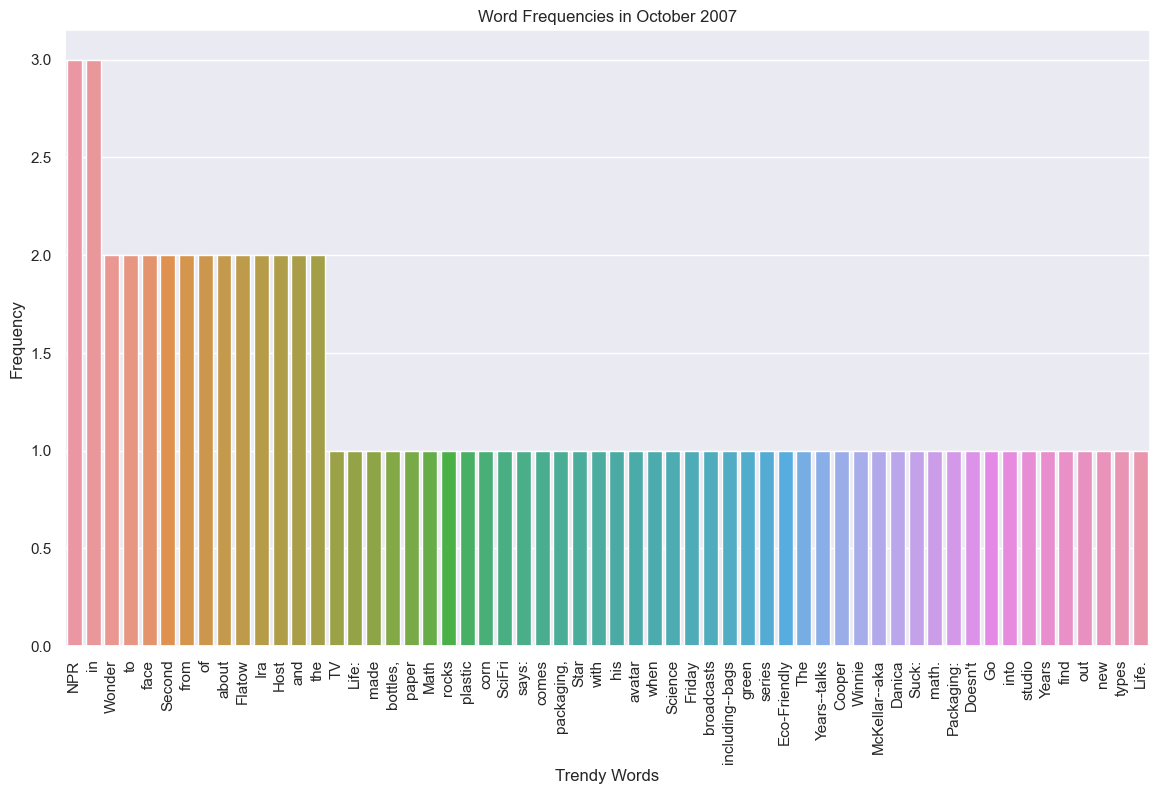

In [69]:
sns.set(rc={'figure.figsize':(14,8)})
sns.barplot(data=new_df, x="Word", y="Frequency")
plt.xticks(rotation=90)
plt.xlabel("Trendy Words")
plt.ylabel("Frequency")
plt.title("Word Frequencies in October 2007")

# Part 4: Clustering and findING trends based off clusters
- we will try performing a set of different clustering algorithms to try and obtain clusters which contains a majority of the videos!
- K-means 
- Transformers: (Work in Progress)

#### Transformer installation

First things first we must download the BERT model developed by Huggingface using the following command:

```pip install -U sentence-transformers```

#### Transformer Clustering: BERT model

In [ ]:
# # transformers can still be useful. Issue was it was too slow so we dont use it in our analysis
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.cluster import KMeans
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.decomposition import PCA
# from sentence_transformers import SentenceTransformer
# import pickle

#### K-means Clustering

In [70]:
import os
import random
import re
import string

import nltk
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

nltk.download("stopwords")
nltk.download('punkt')

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simonlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/simonlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Preprocessing
The data needs to be cleaned from punctuation, letters, and stopwords (a set of words with a low value for the language modeling that can be filtered out).

In [71]:
# a function that cleans our video info
def clean_text(text, tokenizer, stopwords):
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation

    tokens = tokenizer(text)  # Get tokens from text
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens

In [74]:
# preprocessing our dataframe to be clustered
custom_stopwords = set(stopwords.words("english"))

df_cluster = df_raw.copy()

# we need to tokenize our texts.
df_cluster["text"] = df_raw['video_info']
df_cluster["tokens"] = df_cluster["text"].map(lambda x: clean_text(x, word_tokenize, custom_stopwords))

# Remove duplicated after preprocessing
_, idx = np.unique(df_cluster["tokens"], return_index=True)
df_cluster = df_cluster.iloc[idx, :]

# Remove empty values and keep relevant columns
df_cluster = df_cluster.loc[df.tokens.map(lambda x: len(x) > 0), ["text", "tokens"]]

docs = df_cluster["text"].values
tokenized_docs = df_cluster["tokens"].values

print(f"Original dataframe: {df_raw.shape}")
print(f"Pre-processed dataframe: {df_cluster.shape}")

Original dataframe: (15789, 5)
Pre-processed dataframe: (14956, 2)


In [75]:
# transform our sentences into numerical vectors
model = Word2Vec(sentences=tokenized_docs, vector_size=100, workers=1, seed=SEED)

In [76]:
# example of the finding similarities between words
model.wv.most_similar("kyrie")

[('irving', 0.9968152046203613),
 ('patrice', 0.9894890189170837),
 ('jaylen', 0.9892393350601196),
 ('nash', 0.9888480305671692),
 ('isaiah', 0.9863021969795227),
 ('jayson', 0.9860950708389282),
 ('cora', 0.9859108328819275),
 ('gordon', 0.9840365648269653),
 ('bergeron', 0.9839052557945251),
 ('stevens', 0.9824353456497192)]

In [77]:
# Generate vectors for list of documents using a Word Embedding

def vectorize(list_of_docs, model):
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(tokenized_docs, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(14956, 100)

#### Clustering

In [78]:
# Generate clusters and print Silhouette metrics using MBKmeans
def mbkmeans_clusters(X, k, mb, print_silhouette_values):
    """
    Params:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [79]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=200,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels
})

For n_clusters = 200
Silhouette coefficient: 0.11
Silhouette values:
    Cluster 54: Size:63 | Avg:0.63 | Min:0.15 | Max: 0.71
    Cluster 64: Size:28 | Avg:0.62 | Min:0.22 | Max: 0.72
    Cluster 6: Size:24 | Avg:0.52 | Min:0.24 | Max: 0.66
    Cluster 4: Size:45 | Avg:0.48 | Min:0.24 | Max: 0.64
    Cluster 49: Size:89 | Avg:0.46 | Min:0.01 | Max: 0.61
    Cluster 9: Size:35 | Avg:0.46 | Min:0.00 | Max: 0.68
    Cluster 59: Size:99 | Avg:0.40 | Min:-0.02 | Max: 0.60
    Cluster 41: Size:32 | Avg:0.40 | Min:0.01 | Max: 0.59
    Cluster 34: Size:16 | Avg:0.38 | Min:0.10 | Max: 0.56
    Cluster 24: Size:169 | Avg:0.37 | Min:0.01 | Max: 0.54
    Cluster 198: Size:13 | Avg:0.37 | Min:-0.02 | Max: 0.58
    Cluster 79: Size:33 | Avg:0.36 | Min:0.11 | Max: 0.49
    Cluster 67: Size:37 | Avg:0.35 | Min:0.12 | Max: 0.53
    Cluster 180: Size:94 | Avg:0.32 | Min:0.05 | Max: 0.50
    Cluster 174: Size:32 | Avg:0.30 | Min:0.12 | Max: 0.47
    Cluster 149: Size:14 | Avg:0.29 | Min:-0.07 | Max: 0.4

In [80]:
# example of what our clustered dataframe looks like
df_clusters

,text,tokens,cluster
0,"1000s of fake designer bags and clothes BUSTED: Louis Vuitton, Michael Kors, Gucci, Chanel, Burberry, Rolex and more! Federal agents and Houston police officers had to bring in a semi-truck to seize all the bags, clothes and watches confiscated after the arrests of a father and son considered to be the largest distributors of fake luxury goods in the Houston region.\n\nShahid Nadeem, 53, and his son, Saad Nadeem, 21, remain in federal detention, accused of trafficking in counterfeit goods.\n\nhttps://abc13.com/missouri-city-father-and-son-arrested-in-designer-fakes-bust/5233228/",1000s fake designer bags clothes busted louis vuitton michael kors gucci chanel burberry rolex federal agents houston police officers bring semi truck seize bags clothes watches confiscated arrests father son considered largest distributors fake luxury goods houston region shahid nadeem son saad nadeem remain federal detention accused trafficking counterfeit goods httpsabc13commissouri city father son arrested designer fakes bust5233228,20
1,$100B over 10 years: Sen. Elizabeth Warren talks opioid plan: Sen. Elizabeth Warren spoke to reporters about her proposal to spend $100 billion over 10 years to fight the opioid crisis.,100b years sen elizabeth warren talks opioid plan sen elizabeth warren spoke reporters proposal spend billion years fight opioid crisis,33
2,"$100K monthly rent in NJ ... for real!: Looking for a summer rental? If you don't mind dropping six-figures on a rental, here's what the Jersey Shore and and North Jersey have to offer.\n\nNew to the page? Subscribe above!\n\nVisit our website: http://nj1015.com/\nLike us on Facebook: https://www.facebook.com/nj1015\nFollow us: https://twitter.com/nj1015\nReceive our newsletter: http://nj1015.com/registration/\n\nFor any licensing requests please contact trenton.youtube@townsquaremedia.com",100k monthly rent nj real looking summer rental dont mind dropping six figures rental heres jersey shore north jersey offer new page subscribe visit website httpnj1015com like us facebook httpswwwfacebookcomnj1015 follow us httpstwittercomnj1015 receive newsletter httpnj1015comregistration licensing requests please contact trentonyoutubetownsquaremediacom,93
3,"100's of raffle prizes dished out at Holyoke Senior Fest 2017: The Holyoke, Massachusetts Senior Fest boasted a crowd of 280 on Wednesday, Aug. 30, 2017 at the Log Cabin Banquet and Meeting House, 500 Easthampton Road. Gift baskets, a home alarm system and a television were among 200 raffle prizes.",100s raffle prizes dished holyoke senior fest holyoke massachusetts senior fest boasted crowd wednesday aug log cabin banquet meeting house easthampton road gift baskets home alarm system television among raffle prizes,193
4,"104th Fighter Wing airmen deployed to Bagram Airfield, Afghanistan, send holiday greetings: In this video by Senior Airman Jean-Paul Arnaud-Marquez, airmen from the 104th Fighter Wing at Barnes Air National Guard Base in Westfield, Massachusetts, currently deployed to Bagram Airfield, Afghanistan, send holiday greetings to folks back home.",104th fighter wing airmen deployed bagram airfield afghanistan send holiday greetings video senior airman jean paul arnaud marquez airmen 104th fighter wing barnes air national guard base westfield massachusetts currently deployed bagram airfield afghanistan send holiday greetings folks back home,2
...,...,...,...
14951,"អើ!ចប់ប្រើយ យួនមកជួបសខេងពេលហ៊ុនសែនមិននៅ: Hello everyone. I would like to introduce all of you to a very useful channel, Mr. Fortune Teller HD. This channel shares you useful information and daily fortune telling.\n\nrfa, rfi, khmer news, khmer hot news, khmer politics, Cambodia, Cambodian news, radios, hun sen, sam rainsy, kem sokha, khem veasna, ldp, cnrp, cpp, long chantha, he phearum, Buddhism, Buddhist monks, venerable Buddhist monks, ឡុង ចន្ថា ហ៊ី ភារម្យ សម្តេច​ ហ៊ុន សែន សម រង្ស៊ី កឹម សុខា ខឹម វាសនា",អើចប់ប្រើយ យួនមកជួបសខេងពេលហ៊ុនសែនមិននៅ hello everyo

this cell shows off specific "political themes" that we can look at per cluster!

In [81]:
print("Most representative terms per cluster (based on centroids):")
for i in range(200):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: jenkinsons battleship halloween cherry differently 
Cluster 1: httpstwittercomnj1015 us httpswwwfacebookcomnj1015 licensing newsletter 
Cluster 2: disaster jamaica holyokes represented sculpture 
Cluster 3: masslivecom shares content mr useful 
Cluster 4: rfi rfa ឡាយស្រេង ម៉ក khmer 
Cluster 5: open casino gathered rail snowfall 
Cluster 6: httpsabc13comfoodcooking full stories cooking recipe 
Cluster 7: soxs sox prospect rafael pedro 
Cluster 8: httpswwwfacebookcomnj1015 httpstwittercomnj1015 receive us httpsgoogl7gnjzz 
Cluster 9: rfi rfa ឡាយស្រេង ម៉ក rainsy 
Cluster 10: appleton gathered casino easthampton wilbraham 
Cluster 11: stephon duron cornerback explained pats 
Cluster 12: englewood deptford showing dramatic audio 
Cluster 13: nationals conservatory nfc prior legend 
Cluster 14: debates discussion phil governors edition 
Cluster 15: title iv semifinals defeated westfield 
Cluster 16: httpstwittercomnj1015 

In [82]:
# Example of some samples from a cluster: South East Asia related?
test_cluster = 4
most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_docs - clustering.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:10]:
    print(docs[d])
    print("-------------")

ចុម! កាឌុមឆែប តា លឺ ឡាយស្រេង ផ្ញើសារអោយ  ព្រះមហាក្សត្រធ្វើបាតុកម្ម: Hello everyone. I would like to introduce all of you to a very useful channel, Mr. Fortune Teller HD. This channel shares you useful information and daily fortune telling.

rfa, rfi, khmer news, khmer hot news, khmer politics, Cambodia, Cambodian news, radios, hun sen, sam rainsy, kem sokha, khem veasna, ldp, cnrp, cpp, long chantha, he phearum, Buddhism, Buddhist monks, venerable Buddhist monks, ឡុង ចន្ថា ហ៊ី ភារម្យ សម្តេច​ ហ៊ុន សែន សម រង្ស៊ី កឹម សុខា ខឹម វាសនា
-------------
តា ម៉ក ហឺន ពិភាក្សារឿងកម្មកររោងចក្រនិង សូមកុំអោយអ្នកវីភាគឈប់ទាស់គ្នា: Hello everyone. I would like to introduce all of you to a very useful channel, Mr. Fortune Teller HD. This channel shares you useful information and daily fortune telling.

rfa, rfi, khmer news, khmer hot news, khmer politics, Cambodia, Cambodian news, radios, hun sen, sam rainsy, kem sokha, khem veasna, ldp, cnrp, cpp, long chantha, he phearum, Buddhism, Buddhist monks, venerab

Text(0, 0.5, 'Video Counts')

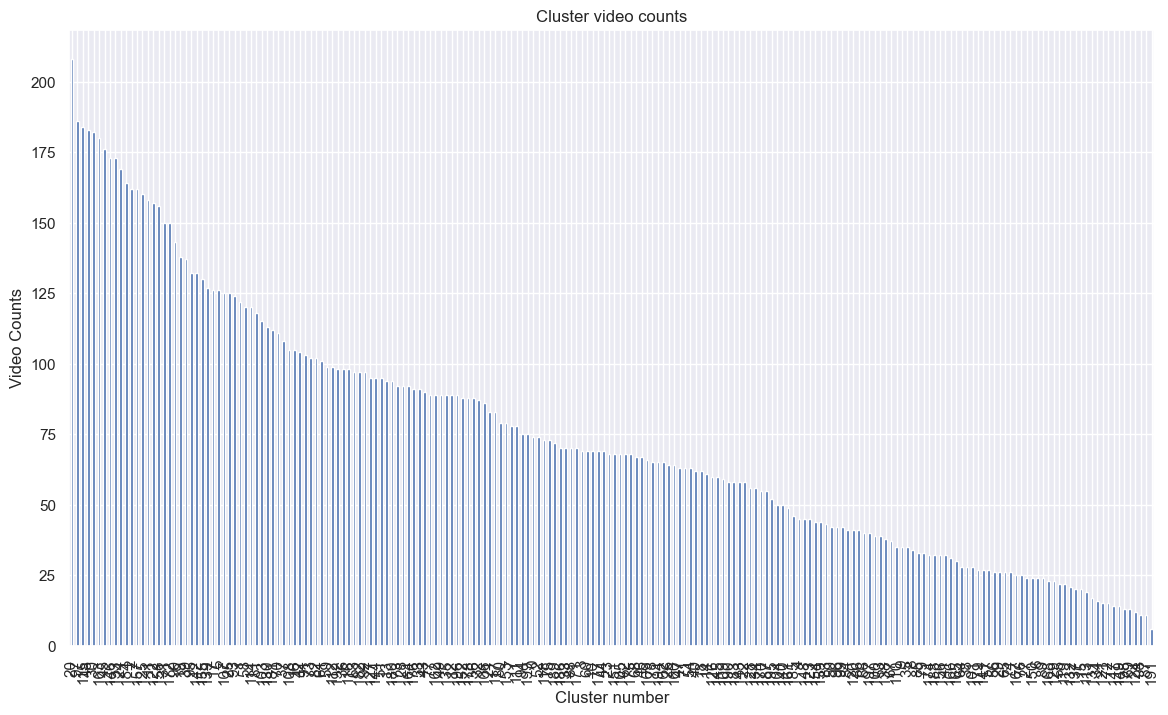

In [89]:
df_clusters['cluster'].value_counts().plot(kind="bar")
plt.title("Cluster video counts")
plt.xlabel("Cluster number")
plt.ylabel("Video Counts")

- same graph but unordered by counts. Rather ordered by cluster number

Text(0.5, 1.0, 'Counts for each cluster (n=200)')

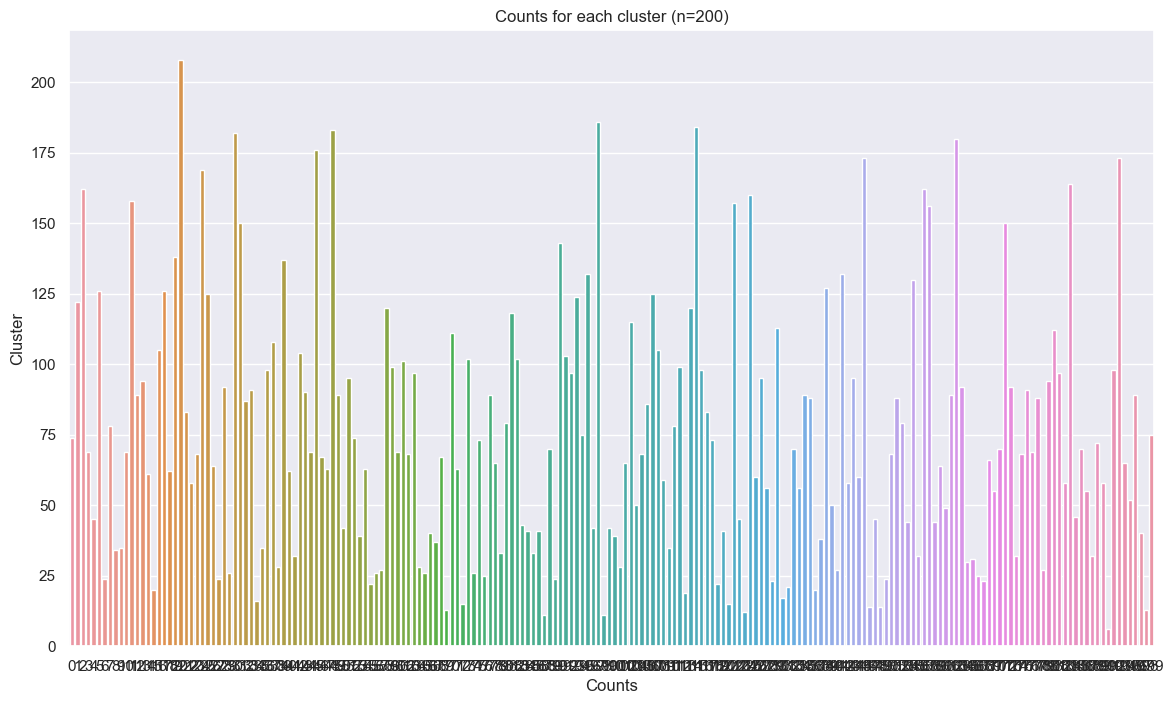

In [90]:
ax = sns.countplot(x="cluster", data=df_clusters)
ax.set_ylabel("Counts")
ax.set_xlabel("Cluster")
ax.set_title("Counts for each cluster (n=200)")

### Finding the best k for clustering by calculating Silohuette values $S(i)$ and picking the one with the highest $S(i)$

In [91]:
def mbkmeans_clusters_sil(X, k, mb, print_silhouette_values):
    """
    same as previous function except now we are interested in best k parameter 

    Params:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    sample_silhouette_values = silhouette_score(X, km.labels_)
    print(f"Silhouette coefficient: {sample_silhouette_values:0.2f}")
    
    return km, km.labels_, sample_silhouette_values

In [92]:
S_value = []

In [93]:
from tqdm import tqdm

# checking for best k values. We will run on a bigger range later but for now we will demonstarte with this small sample
for i in tqdm(range(2,50)):
    clustering, cluster_labels, silohuette = mbkmeans_clusters_sil(X=vectorized_docs,k=i,mb=500,print_silhouette_values=True)
    S_value.append(silohuette)

  0%|          | 0/48 [00:00<?, ?it/s]

For n_clusters = 2


  2%|▏         | 1/48 [00:02<02:15,  2.87s/it]

Silhouette coefficient: 0.58
For n_clusters = 3


  4%|▍         | 2/48 [00:05<01:59,  2.59s/it]

Silhouette coefficient: 0.42
For n_clusters = 4


  6%|▋         | 3/48 [00:07<01:54,  2.55s/it]

Silhouette coefficient: 0.41
For n_clusters = 5


  8%|▊         | 4/48 [00:10<01:48,  2.48s/it]

Silhouette coefficient: 0.38
For n_clusters = 6


 10%|█         | 5/48 [00:11<01:36,  2.25s/it]

Silhouette coefficient: 0.24
For n_clusters = 7


 12%|█▎        | 6/48 [00:13<01:30,  2.16s/it]

Silhouette coefficient: 0.26
For n_clusters = 8


 15%|█▍        | 7/48 [00:15<01:24,  2.06s/it]

Silhouette coefficient: 0.24
For n_clusters = 9


 17%|█▋        | 8/48 [00:17<01:18,  1.96s/it]

Silhouette coefficient: 0.24
For n_clusters = 10


 19%|█▉        | 9/48 [00:19<01:19,  2.03s/it]

Silhouette coefficient: 0.23
For n_clusters = 11


 21%|██        | 10/48 [00:21<01:19,  2.09s/it]

Silhouette coefficient: 0.28
For n_clusters = 12


 23%|██▎       | 11/48 [00:24<01:27,  2.37s/it]

Silhouette coefficient: 0.23
For n_clusters = 13


 25%|██▌       | 12/48 [00:27<01:28,  2.47s/it]

Silhouette coefficient: 0.26
For n_clusters = 14


 27%|██▋       | 13/48 [00:29<01:18,  2.24s/it]

Silhouette coefficient: 0.26
For n_clusters = 15


 29%|██▉       | 14/48 [00:31<01:10,  2.07s/it]

Silhouette coefficient: 0.26
For n_clusters = 16


 31%|███▏      | 15/48 [00:32<01:04,  1.94s/it]

Silhouette coefficient: 0.26
For n_clusters = 17


 33%|███▎      | 16/48 [00:34<00:58,  1.83s/it]

Silhouette coefficient: 0.23
For n_clusters = 18


 35%|███▌      | 17/48 [00:36<00:56,  1.81s/it]

Silhouette coefficient: 0.23
For n_clusters = 19


 38%|███▊      | 18/48 [00:37<00:53,  1.78s/it]

Silhouette coefficient: 0.22
For n_clusters = 20


 40%|███▉      | 19/48 [00:39<00:50,  1.76s/it]

Silhouette coefficient: 0.20
For n_clusters = 21


 42%|████▏     | 20/48 [00:41<00:48,  1.71s/it]

Silhouette coefficient: 0.20
For n_clusters = 22


 44%|████▍     | 21/48 [00:42<00:45,  1.68s/it]

Silhouette coefficient: 0.19
For n_clusters = 23


 46%|████▌     | 22/48 [00:44<00:43,  1.66s/it]

Silhouette coefficient: 0.18
For n_clusters = 24


 48%|████▊     | 23/48 [00:45<00:40,  1.64s/it]

Silhouette coefficient: 0.18
For n_clusters = 25


 50%|█████     | 24/48 [00:47<00:39,  1.66s/it]

Silhouette coefficient: 0.19
For n_clusters = 26


 52%|█████▏    | 25/48 [00:49<00:37,  1.65s/it]

Silhouette coefficient: 0.18
For n_clusters = 27


 54%|█████▍    | 26/48 [00:51<00:38,  1.74s/it]

Silhouette coefficient: 0.17
For n_clusters = 28


 56%|█████▋    | 27/48 [00:52<00:35,  1.69s/it]

Silhouette coefficient: 0.18
For n_clusters = 29


 58%|█████▊    | 28/48 [00:54<00:33,  1.65s/it]

Silhouette coefficient: 0.17
For n_clusters = 30


 60%|██████    | 29/48 [00:55<00:30,  1.63s/it]

Silhouette coefficient: 0.17
For n_clusters = 31


 62%|██████▎   | 30/48 [00:57<00:29,  1.61s/it]

Silhouette coefficient: 0.17
For n_clusters = 32


 65%|██████▍   | 31/48 [00:59<00:28,  1.67s/it]

Silhouette coefficient: 0.18
For n_clusters = 33


 67%|██████▋   | 32/48 [01:00<00:26,  1.64s/it]

Silhouette coefficient: 0.17
For n_clusters = 34


 69%|██████▉   | 33/48 [01:02<00:24,  1.61s/it]

Silhouette coefficient: 0.17
For n_clusters = 35


 71%|███████   | 34/48 [01:03<00:22,  1.60s/it]

Silhouette coefficient: 0.17
For n_clusters = 36


 73%|███████▎  | 35/48 [01:05<00:20,  1.60s/it]

Silhouette coefficient: 0.16
For n_clusters = 37


 75%|███████▌  | 36/48 [01:07<00:19,  1.60s/it]

Silhouette coefficient: 0.17
For n_clusters = 38


 77%|███████▋  | 37/48 [01:08<00:18,  1.68s/it]

Silhouette coefficient: 0.16
For n_clusters = 39


 79%|███████▉  | 38/48 [01:10<00:16,  1.66s/it]

Silhouette coefficient: 0.16
For n_clusters = 40


 81%|████████▏ | 39/48 [01:12<00:15,  1.67s/it]

Silhouette coefficient: 0.17
For n_clusters = 41


 83%|████████▎ | 40/48 [01:13<00:13,  1.64s/it]

Silhouette coefficient: 0.16
For n_clusters = 42


 85%|████████▌ | 41/48 [01:15<00:11,  1.61s/it]

Silhouette coefficient: 0.16
For n_clusters = 43


 88%|████████▊ | 42/48 [01:16<00:09,  1.60s/it]

Silhouette coefficient: 0.17
For n_clusters = 44


 90%|████████▉ | 43/48 [01:18<00:08,  1.60s/it]

Silhouette coefficient: 0.15
For n_clusters = 45


 92%|█████████▏| 44/48 [01:20<00:06,  1.64s/it]

Silhouette coefficient: 0.16
For n_clusters = 46


 94%|█████████▍| 45/48 [01:22<00:05,  1.68s/it]

Silhouette coefficient: 0.15
For n_clusters = 47


 96%|█████████▌| 46/48 [01:23<00:03,  1.71s/it]

Silhouette coefficient: 0.16
For n_clusters = 48


 98%|█████████▊| 47/48 [01:25<00:01,  1.67s/it]

Silhouette coefficient: 0.16
For n_clusters = 49


100%|██████████| 48/48 [01:27<00:00,  1.82s/it]

Silhouette coefficient: 0.16


In [94]:
len(S_value)

48

48


Text(0.5, 0, 'k')

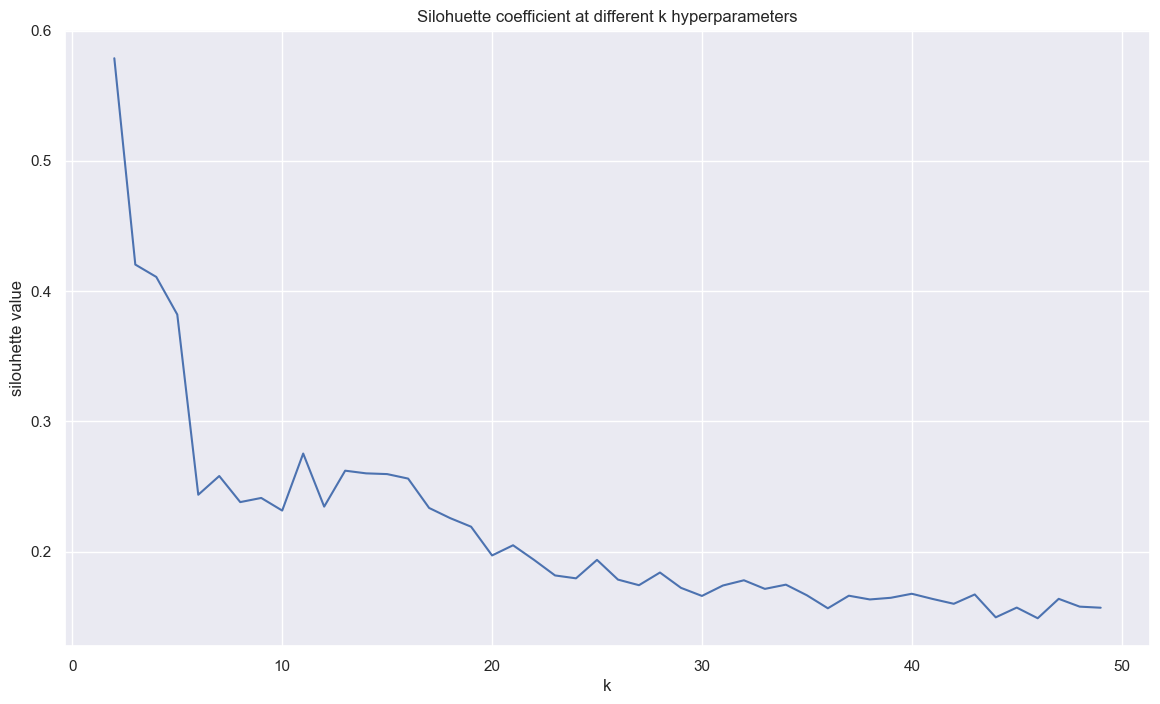

In [95]:
# plot k by S 
# selecting k based on highest S value like we learned in class
k = np.arange(2,50)
print(len(k))
sns.lineplot( x=k, y=S_value)
plt.title("Silohuette coefficient at different k hyperparameters")
plt.ylabel("silouhette value")
plt.xlabel("k")

our cluster count gets progressively worse for bigger k

## Extraction of data from [timeline of events](https://en.wikipedia.org/wiki/Timeline_of_the_21st_century)

Need to download the xml file on this [link](https://en.wikipedia.org/wiki/Special:Export/Timeline_of_the_21st_century)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from bs4 import BeautifulSoup
import re
import os
import string
import random

import nltk

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

nltk.download("stopwords")
nltk.download('punkt')

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arbenmiftari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arbenmiftari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
path = '../datasets/wiki_events.xml'
with open(path, 'r') as f:
    data = f.read()

Bs_data = BeautifulSoup(data, "xml")

In [5]:
plain_txt = Bs_data.text
idx = plain_txt.find('===[[2015]]===')
text = plain_txt[idx:]

In [6]:
text = text.replace('\n\n', '\n')
text = text.replace('[', '')
text = text.replace(']', '')

In [7]:
split_txt = text.split('\n')

In [8]:
copy_txt = split_txt.copy()
new_list=[]
for txt in copy_txt:
    if 'see' in txt:
        continue
    if 'See' in txt:
        break
    if  '2020s' in txt:
        continue
    if '--' in txt:
        continue
    if '===' not in txt:
        new_list.append(txt[2:])
    else:
        new_list.append(txt)

In [9]:
list_tuples = []
for i,element in enumerate(new_list):
    if '===' in element:
        year = element[3:7]
        continue
    list_tuples.append((year, element))

In [10]:
events_df = pd.DataFrame(list_tuples, columns =['Year', 'Event'])

In [11]:
events_df.to_csv('../datasets/wiki_events.csv')

# Data exploration to determine controversial videos

In [13]:
#Videos informations and state (num of likes/views) 
data_metadata_path = "../data/yt_metadata_helper.feather"
df_metadata = pd.read_feather(data_metadata_path)
df_metadata['dummy']=1
df_metadata.head(5)

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count,dummy
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,SBqSc91Hn9g,1159,8.0,2016-09-28,1057.0,1
1,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,UuugEl86ESY,2681,23.0,2016-09-28,12894.0,1
2,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,779.0,oB4c-yvnbjs,1394,1607.0,2016-09-28,1800602.0,1
3,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,24.0,ZaV-gTCMV8E,5064,227.0,2016-09-28,57640.0,1
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,13.0,cGvL7AvMfM0,3554,105.0,2016-09-28,86368.0,1


In [14]:
def check_nan(df):
    check = False
    for col in df.columns:
        if df[col].isnull().values.any():
            print(col)
            check = True
    if not check:
            print('None')
check_nan(df_metadata)

dislike_count
like_count
view_count


In [15]:
df_metadata.fillna(0, inplace=True)
df_metadata.sample(10)

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count,dummy
40387476,Gaming,UCMa1pCGMAkpoAqcFs4rzobQ,5.0,pcS8vdbgKSY,1820,60.0,2015-07-28,8682.0,1
59938088,News & Politics,UC7TvL4GlQyMBLlUsTrN_C4Q,3.0,5GymDkjHxs0,845,201.0,2012-06-07,5080.0,1
24314416,Autos & Vehicles,UCZ_PjKRDIuMnzHgkFdsexTg,6.0,lUluqXjMqWg,30,167.0,2018-04-30,3568.0,1
19419205,News & Politics,UCcddmqHBErfequ4xYj9orJQ,0.0,_O3PaZJ-aH0,104,0.0,2019-05-26,19.0,1
23830875,Sports,UC_2ynsXrRrKP8zYrU7Hc06A,0.0,2tazvcwlUsM,103,65.0,2012-04-29,14349.0,1
10611395,Gaming,UCjKIkpn1ZK6Wqigen1YBAYA,2.0,kyocOBHe0k0,624,333.0,2008-09-26,35536.0,1
40738130,Autos & Vehicles,UCMD-5-FLQLsaeYsTojlFGhg,0.0,FXW4zoNSkKE,17,3.0,2010-03-12,2597.0,1
37210867,News & Politics,UCP0uG-mcMImgKnJz-VjJZmQ,0.0,9RE4ktJfZxE,26,15.0,2019-05-15,3134.0,1
30129773,Entertainment,UCUvnGMNl0KQC5HNZXDnp9eA,1.0,kRgi_SG2SSo,134,2.0,2018-11-25,86.0,1
53935821,News & Politics,UCCK3OZi788Ok44K97WAhLKQ,1.0,ttnKFVr0g2A,113,7.0,2018-06-20,633.0,1


In [16]:
df_cat_count = df_metadata.copy()
df_cat_count = df_cat_count.groupby("categories", as_index=False).sum()
df_cat_count.drop(labels=[0,8,15], axis=0, inplace=True)

In [17]:
df_cat_count

,categories,dislike_count,duration,like_count,view_count,dummy
1,Autos & Vehicles,6.790556e+07,852657449,9.563003e+08,1.230943e+11,2256967
2,Comedy,2.332550e+08,596953237,6.134163e+09,3.450391e+11,1172503
3,Education,3.853637e+08,3692708661,2.881362e+09,5.023918e+11,3795564
4,Entertainment,1.479342e+09,7666398193,2.014055e+10,2.287748e+12,12276397
5,Film & Animation,3.143058e+08,1505306945,3.737847e+09,5.762808e+11,2359736
6,Gaming,7.142940e+08,19654718199,1.735133e+10,1.042503e+12,13720303
7,Howto & Style,2.924541e+08,2322773279,5.790819e+09,4.206668e+11,3968127
9,Music,8.917641e+08,3913741624,1.927046e+10,2.474987e+12,8305003
10,News & Politics,2.000406e+08,4565935814,1.892883e+09,1.586424e+11,8881022
11,Nonprofits & Activism,1.435273e+07,930119676,2.429490e+08,1.850841e+10,777449


<AxesSubplot:xlabel='categories'>

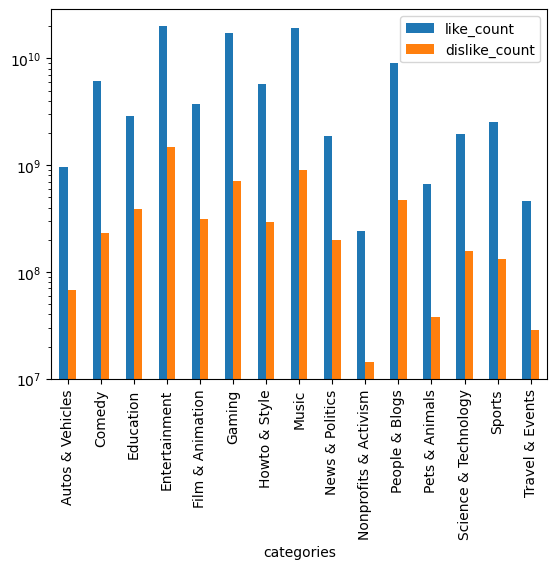

In [18]:
df_cat_count.plot.bar(x='categories', y=['like_count', 'dislike_count'], logy=True)

We observe on this bar plot that the 'News & Politics' is one of the categories with the most amount of dislikes with respect to its total number of likes. It might suggest that this topic deal with subjects that are more controversial.

In [19]:
df_cat_count['ratio']=df_cat_count['dislike_count']/(df_cat_count['like_count']+df_cat_count['dislike_count'])
df_cat_count[['categories', 'ratio']].sort_values(by=['ratio'])
df_cat_count

,categories,dislike_count,duration,like_count,view_count,dummy,ratio
1,Autos & Vehicles,6.790556e+07,852657449,9.563003e+08,1.230943e+11,2256967,0.066301
2,Comedy,2.332550e+08,596953237,6.134163e+09,3.450391e+11,1172503,0.036633
3,Education,3.853637e+08,3692708661,2.881362e+09,5.023918e+11,3795564,0.117966
4,Entertainment,1.479342e+09,7666398193,2.014055e+10,2.287748e+12,12276397,0.068425
5,Film & Animation,3.143058e+08,1505306945,3.737847e+09,5.762808e+11,2359736,0.077565
6,Gaming,7.142940e+08,19654718199,1.735133e+10,1.042503e+12,13720303,0.039539
7,Howto & Style,2.924541e+08,2322773279,5.790819e+09,4.206668e+11,3968127,0.048075
9,Music,8.917641e+08,3913741624,1.927046e+10,2.474987e+12,8305003,0.044229
10,News & Politics,2.000406e+08,4565935814,1.892883e+09,1.586424e+11,8881022,0.095580
11,Nonprofits & Activism,1.435273e+07,930119676,2.429490e+08,1.850841e+10,777449,0.055782


<AxesSubplot:xlabel='categories'>

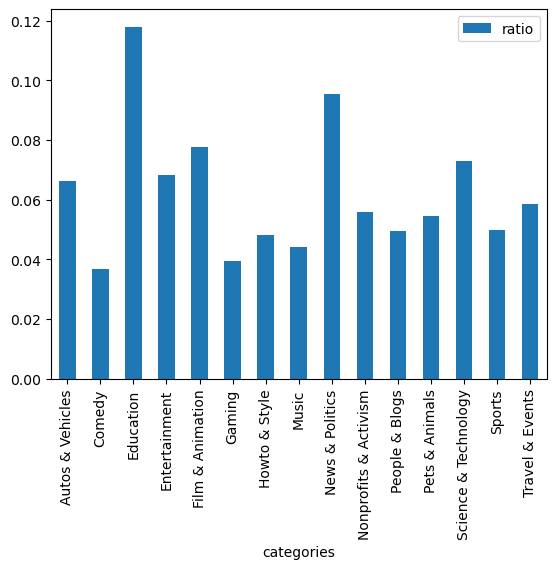

In [20]:
df_cat_count.plot.bar(x='categories', y='ratio')

In [21]:
df = df_metadata.copy()
df['ratio']=df['dislike_count']/(df['like_count']+df['dislike_count'])

In [22]:
df['ratio'].fillna(0, inplace=True)
df['ratio'].isnull().unique()

array([False])

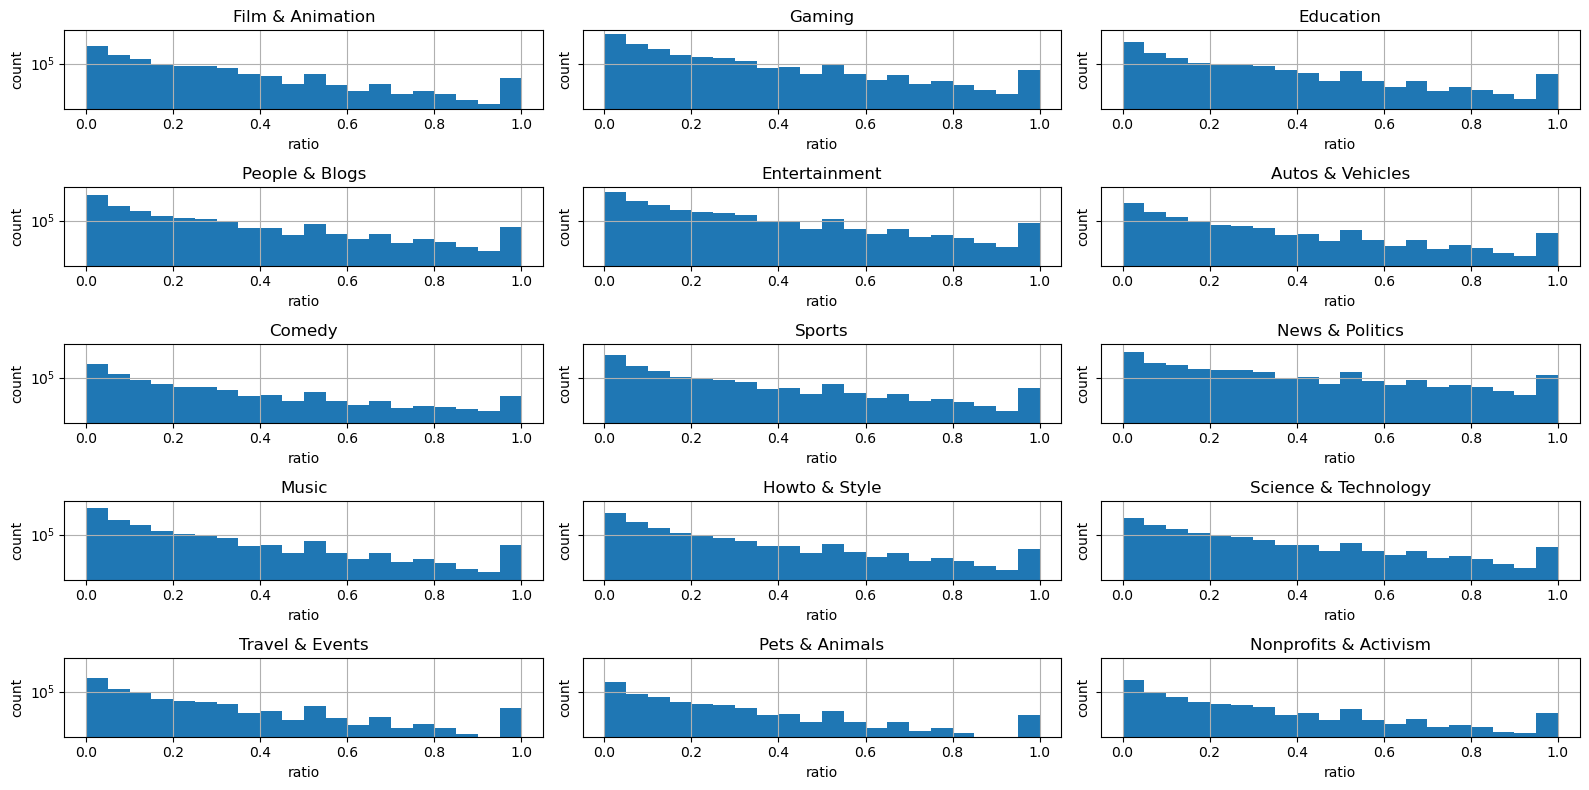

In [23]:
fig, axs = plt.subplots(5,3, figsize=(16,8), sharey=True)

for cat,ax in zip(df['categories'].unique(), axs.ravel()):
    df[df.categories==cat].hist(column='ratio', bins=20 ,ax=ax, log=True)
    ax.set_title(cat)
    ax.set_xlabel('ratio')
    ax.set_ylabel('count')
plt.tight_layout()

We observe that the ratio between dislike and total of likes and dislikes for 'News & Politics' videos is sparser on x-axis compared to other categories. So it means for this topics that the people show more their disagremement towards the content of the video. It can be explained by the fact that these types of videos deal with more controversial subjects. 
Therefore, it would interesing to determine which topics can be considered as more controversial as others. In addition, it would be interesing to also look at the distribution between controversial and non-controversial videos and analyze if these channels upload mostly controversial contents or not.

## Exploration of the content for controversial videos

In [59]:
path = '../datasets/metadata_chunks/'
csv_files = glob.glob(path+'*.csv.gz')
df0 = pd.read_csv(csv_files[50], usecols=['categories', 'description', 'tags', 'title', 'dislike_count', 'like_count'])
df0.head(5)

,categories,description,dislike_count,like_count,tags,title
0,Gaming,Etrian Odyssey Untold The Millennium Girl Boss...,1.0,5.0,"Etrian Odyssey Untold The Millennium Girl,Etri...",Etrian Odyssey Untold The Millennium Girl Boss...
1,Gaming,Etrian Odyssey Untold The Millennium Girl Boss...,0.0,6.0,"Etrian Odyssey Untold The Millennium Girl,Etri...",Etrian Odyssey Untold The Millennium Girl Boss...
2,Gaming,Etrian Odyssey Untold The Millennium Girl Boss...,0.0,6.0,"Etrian Odyssey Untold The Millennium Girl,Etri...",Etrian Odyssey Untold The Millennium Girl Boss...
3,Gaming,Etrian Odyssey Untold The Millennium Girl Boss...,0.0,5.0,"Etrian Odyssey Untold The Millennium Girl,Etri...",Etrian Odyssey Untold The Millennium Girl Boss...
4,Gaming,Etrian Odyssey Untold The Millennium Girl Boss...,0.0,4.0,"Etrian Odyssey Untold The Millennium Girl,Etri...",Etrian Odyssey Untold The Millennium Girl Boss...


In [60]:
#Data preprocessing: removing unuseful columns, keep videos with at least 50 likes and dislikes
#Keep the columns in which we are interested in
df_raw = df0.drop_duplicates(subset=['title'])
df_raw["video_info"] = df_raw['title'].astype(str) +": "+ df_raw["description"]
df_raw = df_raw.drop(['title'],  axis=1)
df_raw = df_raw.drop(['description'], axis=1)
df_raw = df_raw[df_raw.categories=='News & Politics']
df_raw = df_raw[df_raw.dislike_count+df_raw.like_count > 25]
df_raw['ratio']=df_raw['dislike_count']/(df_raw['like_count']+df_raw['dislike_count'])
df_raw['ratio'].fillna(0, inplace=True)
df_raw = df_raw.drop(['dislike_count', 'like_count', 'categories'],  axis=1)
df_raw.sample(5)

/var/folders/yb/s0f6sw2927z0fg31yb0l2zyc0000gn/T/ipykernel_94828/888422682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw["video_info"] = df_raw['title'].astype(str) +": "+ df_raw["description"]


,tags,video_info,ratio
96742,"Deutsche,Welle,Estonia,Russia,DW-TV,Europa,Eur...",The Other Side - Building Bridges in Europe | ...,0.030303
97978,"DW News,Turkey,Hasankeyf,Ilısu Dam,River Tigri...",Turkey: Dam to flood ancient town of Hasankeyf...,0.130631
97848,"syria safe zone,syrian refugees,turkey refugee...",Turkey proposes a refugee 'safe zone' in north...,0.189349
26791,Cincinnati,"3-year-old girl found safe inside vacant, lock...",0.062500
18721,"mumbai to goa,cruise,Angriya",Mumbai To Goa Cruise | Angriya: #mumbaitogoa #...,0.041667


In [61]:
# keep only videos whose ratio is higher than than a certain quantile
quantile = df_raw['ratio'].quantile(0.33)
print(quantile)
df_raw = df_raw[df_raw.ratio > quantile]
df_raw.sample(5)

0.06451612903225806


,tags,video_info,ratio
98123,"Ukraine,Donbas,Zelenskiy Donbas,Zelenskiy war,...",Zelenskiy raises hopes for peace in Ukraine | ...,0.116788
98825,"Germany,Austria,border,refugees,controls,crimi...",Refugees stuck at German-Austrian border | DW ...,0.517241
92763,"shipwreck,Costa Concordia,scrap,luxury cruiser...",Costa Concordia heads for scrapheap | Business...,0.619048
98258,"Lolwah Al-Khater,Qatar,Saudi Arabia,Iran,terro...",Qatar: Dragging its feet over reform? | Confli...,0.106926
93453,"Ramadan,refugees,Germany,DW,Deutsche Welle",Refugees mark Ramadan at German shelters | DW ...,0.743590


In [62]:
def clean_text(text, tokenizer, stopwords):
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation

    tokens = tokenizer(text)  # Get tokens from text
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens

In [63]:
# preprocessing our dataframe to be clustered
custom_stopwords = set(stopwords.words("english"))

df = df_raw.copy()

# we need to tokenize our texts.
df["text"] = df_raw['video_info']
df["tokens"] = df["text"].map(lambda x: clean_text(x, word_tokenize, custom_stopwords))

# Remove duplicated after preprocessing
_, idx = np.unique(df["tokens"], return_index=True)
df = df.iloc[idx, :]

# Remove empty values and keep relevant columns
df = df.loc[df.tokens.map(lambda x: len(x) > 0), ["text", "tokens"]]

docs = df["text"].values
tokenized_docs = df["tokens"].values

print(f"Original dataframe: {df_raw.shape}")
print(f"Pre-processed dataframe: {df.shape}")

Original dataframe: (1439, 3)
Pre-processed dataframe: (1439, 2)


In [64]:
# transform our sentences into numerical vectors
model = Word2Vec(sentences=tokenized_docs, vector_size=100, workers=1, seed=SEED)

In [65]:
# Generate vectors for list of documents using a Word Embedding

def vectorize(list_of_docs, model):
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(tokenized_docs, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(1439, 100)

In [66]:
# Generate clusters and print Silhouette metrics using MBKmeans
def mbkmeans_clusters(X, k, mb, print_silhouette_values):
    """
    Params:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [67]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=200,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels
})

For n_clusters = 200
Silhouette coefficient: 0.22
Silhouette values:
    Cluster 11: Size:3 | Avg:0.77 | Min:0.73 | Max: 0.83
    Cluster 120: Size:2 | Avg:0.67 | Min:0.65 | Max: 0.68
    Cluster 192: Size:2 | Avg:0.65 | Min:0.62 | Max: 0.69
    Cluster 154: Size:2 | Avg:0.65 | Min:0.64 | Max: 0.67
    Cluster 59: Size:2 | Avg:0.65 | Min:0.61 | Max: 0.69
    Cluster 191: Size:3 | Avg:0.60 | Min:0.55 | Max: 0.66
    Cluster 94: Size:2 | Avg:0.60 | Min:0.59 | Max: 0.60
    Cluster 190: Size:4 | Avg:0.54 | Min:0.41 | Max: 0.61
    Cluster 140: Size:4 | Avg:0.53 | Min:0.44 | Max: 0.57
    Cluster 97: Size:4 | Avg:0.52 | Min:0.20 | Max: 0.66
    Cluster 101: Size:3 | Avg:0.51 | Min:0.35 | Max: 0.62
    Cluster 195: Size:3 | Avg:0.50 | Min:0.39 | Max: 0.62
    Cluster 115: Size:2 | Avg:0.50 | Min:0.41 | Max: 0.59
    Cluster 177: Size:4 | Avg:0.48 | Min:0.41 | Max: 0.59
    Cluster 141: Size:3 | Avg:0.48 | Min:0.44 | Max: 0.54
    Cluster 38: Size:5 | Avg:0.47 | Min:0.31 | Max: 0.66
    Clus

In [68]:
print("Most representative terms per cluster (based on centroids):")
for i in range(200):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: medien sozialen iran den httpwwwdwcomp1imjx 
Cluster 1: africa summit spoke democratic dead 
Cluster 2: google us storiess httpwwwdwcomentop httpsplusgooglecomwlwt 
Cluster 3: medien sozialen httpstwittercomdwnews httpswwwfacebookcomdeutschewellenews ►twitter 
Cluster 4: httpwwwdwcomp1imjx den httpwwwdwcomconflictzone sozialen rhetoric 
Cluster 5: crisis political town work special 
Cluster 6: many parliament right germans would 
Cluster 7: medien sozialen httpstwittercomdwnews ►instagram ►twitter 
Cluster 8: medien sozialen iran den httpstwittercomdwnews 
Cluster 9: medien httpstwittercomdwnews httpswwwfacebookcomdeutschewellenews ►twitter sozialen 
Cluster 10: home says one also eastern 
Cluster 11: ►twitter httpstwittercomdwnews httpswwwfacebookcomdeutschewellenews ►instagram ►facebook 
Cluster 12: migration account httpwwwdwcomp1g7k9 democrats friedman 
Cluster 13: us google like wlwt instagram 
Cluster 14: sozi

# TODO: Compare our Step 3 to Google Trends Data and wiki_events
- Google Trends is simply taking the most popular searches of a specific topic recorded by Google
- If we take our count plots and order them we can obtain the top 10 words from each month/year and compare the output from our models compared to Google Trends


In [ ]:
#1 read in files
#2 separate them by month or year (depending on dataset: {Google: Year, Wiki: Month})
#3 extract the key words from the Google dataset
#4 maybe use transformer to summarize the Wiki data from sentences to words (e.g. t5-small, BERT)
#5 compare these results with our clustering and time series analysis

# Classifying independent news&politics content creators and news organization channels

In [5]:
import re

In [6]:
#remove parentheses and string between parentheses
def remove_nested_parens(input_str):
    """Returns a copy of 'input_str' with any parenthesized text removed. Nested parentheses are handled."""
    result = ''
    paren_level = 0
    for ch in input_str:
        if ch == '(':
            paren_level += 1
        elif (ch == ')') and paren_level:
            paren_level -= 1
        elif not paren_level:
            result += ch
    return result

In [8]:
# Organize Mutiple datasets that contain major news organization Youtube channels USA
df_news1 = pd.read_csv('../datasets/English news organisations/data_english_newsorgs.csv', engine ='python', sep ='\;')
df_news1['Publisher'] = df_news1['Publisher'].apply(remove_nested_parens)
df_news1 = df_news1['Publisher']

In [9]:
df_news2 = pd.read_csv('../datasets/English news organisations/news papers usa.csv', engine ='python', sep ='\;')
df_news2['Newspaper'] = df_news2['Newspaper'].apply(remove_nested_parens)
df_news2 = df_news2['Newspaper']

In [10]:
df_news3 = pd.read_csv('../datasets/English news organisations/indian media.csv', engine ='python', sep ='\;')
df_news3 = df_news3['Indian media']

In [11]:
df_news4 = pd.read_csv('../datasets/English news organisations/usa media.csv', engine ='python', sep ='\;')
df_news4 = df_news4['Media channels']

In [12]:
df_news5 = pd.read_csv('../datasets/English news organisations/canadian media2.csv', engine ='python', sep ='\;')
df_news5 = df_news5['Canadian media']

In [13]:
# make one list of mainstream news organizations
df_news = pd.DataFrame(df_news1.append([df_news2, df_news3, df_news4, df_news5], 
                  ignore_index = True))
df_news.drop_duplicates()
df_news.rename(columns = {0:'mainstream news organizations'}, inplace = True)

<ipython-input-13-202ddc6b9fe8>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_news = pd.DataFrame(df_news1.append([df_news2, df_news3, df_news4, df_news5],


In [14]:
# make a copy to make the list upper case'
temp1 = df_news.copy()
temp1['mainstream news organizations'] = temp1['mainstream news organizations'].str.upper()
temp1.head(30)

,mainstream news organizations
0,CNN
1,ABC NEWS
2,BBC NEWS
3,FOX NEWS
4,AL JAZEERA
5,VICE NEWS
6,NBC NEWS
7,WION
8,SKY NEWS
9,MSNBC


In [16]:
# Channels data set
df_channels = pd.read_csv('../datasets/df_channels_en.tsv', compression="infer", sep="\t")
df_channels.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


In [17]:
# Keep channels that are in the category 'News & Politics'
df_filtered_channels = df_channels[( df_channels['category_cc']=='News & Politics')]

In [18]:
# make a copy to make the column 'name_cc' upper case
temp2 = df_filtered_channels.copy()
temp2['name_cc'] = temp2['name_cc'].str.upper()

In [19]:
# Create a DataFrame that only contains major new organizations data
df_filtered_news_org = temp2[temp2['name_cc'].isin(temp1['mainstream news organizations'])]
df_filtered_news_org['creator_type'] = "news organization"
df_filtered_news_org.head()

<ipython-input-19-00b394d66de1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_news_org['creator_type'] = "news organization"


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,creator_type
425,News & Politics,2005-10-02,UCupvZG-5ko_eiXAupbDfxWw,CNN,7500000,146299,720.0,2.0870,news organization
527,News & Politics,2014-03-04,UCLXo7UDZvByw2ixzpQCufnA,VOX,6570000,1048,924.0,2.0870,news organization
806,News & Politics,2006-04-08,UC16niRr50-MSBwiO3YDb3RA,BBC NEWS,5190000,10459,1531.0,2.0870,news organization
919,News & Politics,2013-11-20,UCZaT_X_mc0BI-djXOlfhqWQ,VICE NEWS,4630000,4219,1770.0,2.0870,news organization
1028,News & Politics,2005-12-21,UC1yBKRuGpC1tSM73A0ZjYjQ,THE YOUNG TURKS,4470000,37847,1995.0,2.0995,news organization


In [20]:
# Create a DataFrame that contains the rest(independent content creators)
df_filtered_news_ind = temp2[~temp2['name_cc'].isin(temp1['mainstream news organizations'])]
df_filtered_news_ind['creator_type'] = "independent"

<ipython-input-20-416b1f8f220c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_news_ind['creator_type'] = "independent"


In [21]:
frames = [df_filtered_news_org, df_filtered_news_ind]

In [22]:
df_filter_news_merge = pd.concat(frames)
df_filter_news_merge.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,creator_type
425,News & Politics,2005-10-02,UCupvZG-5ko_eiXAupbDfxWw,CNN,7500000,146299,720.0,2.0870,news organization
527,News & Politics,2014-03-04,UCLXo7UDZvByw2ixzpQCufnA,VOX,6570000,1048,924.0,2.0870,news organization
806,News & Politics,2006-04-08,UC16niRr50-MSBwiO3YDb3RA,BBC NEWS,5190000,10459,1531.0,2.0870,news organization
919,News & Politics,2013-11-20,UCZaT_X_mc0BI-djXOlfhqWQ,VICE NEWS,4630000,4219,1770.0,2.0870,news organization
1028,News & Politics,2005-12-21,UC1yBKRuGpC1tSM73A0ZjYjQ,THE YOUNG TURKS,4470000,37847,1995.0,2.0995,news organization


To do: explore the channel data labeled as indepent and news organization